# 02.DNN(심층 신경망, Deep Neural Network)

>  집 값 예측하기

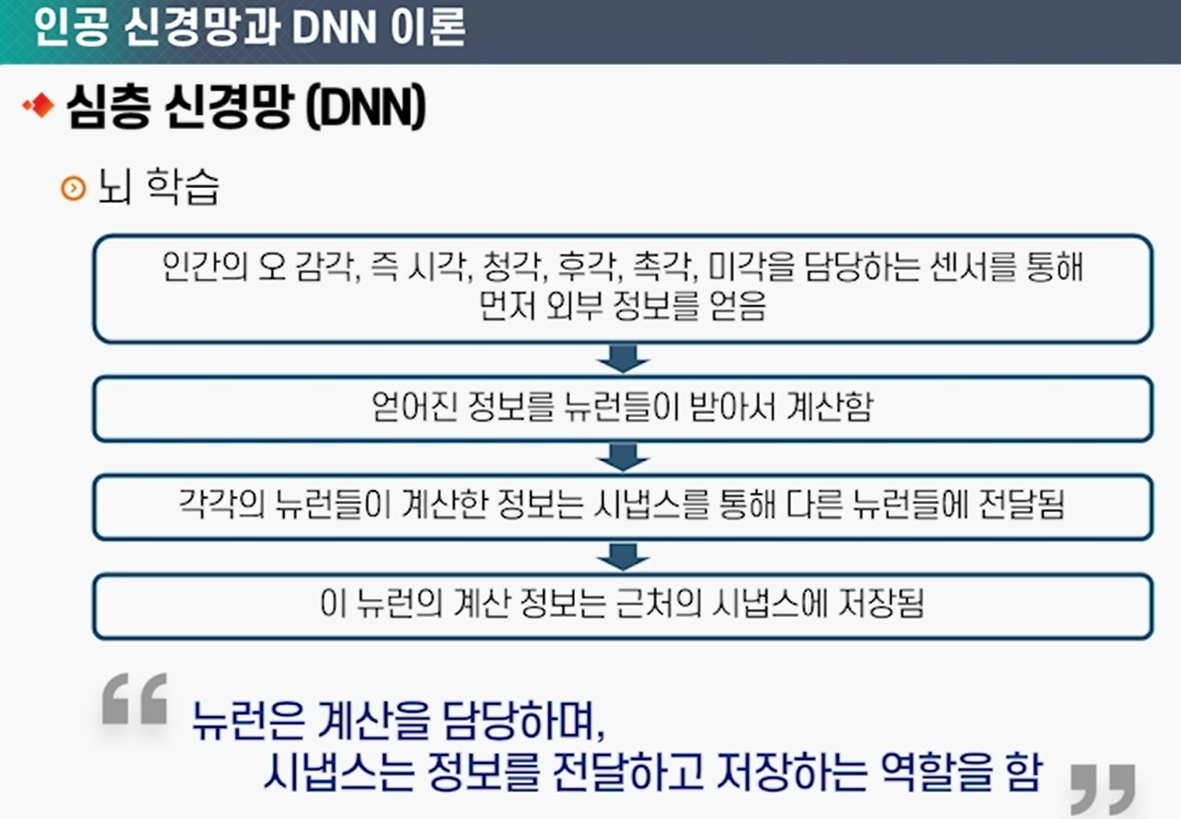

In [1]:
from IPython.display import Image

Image('img/day01_02.png', width=600)

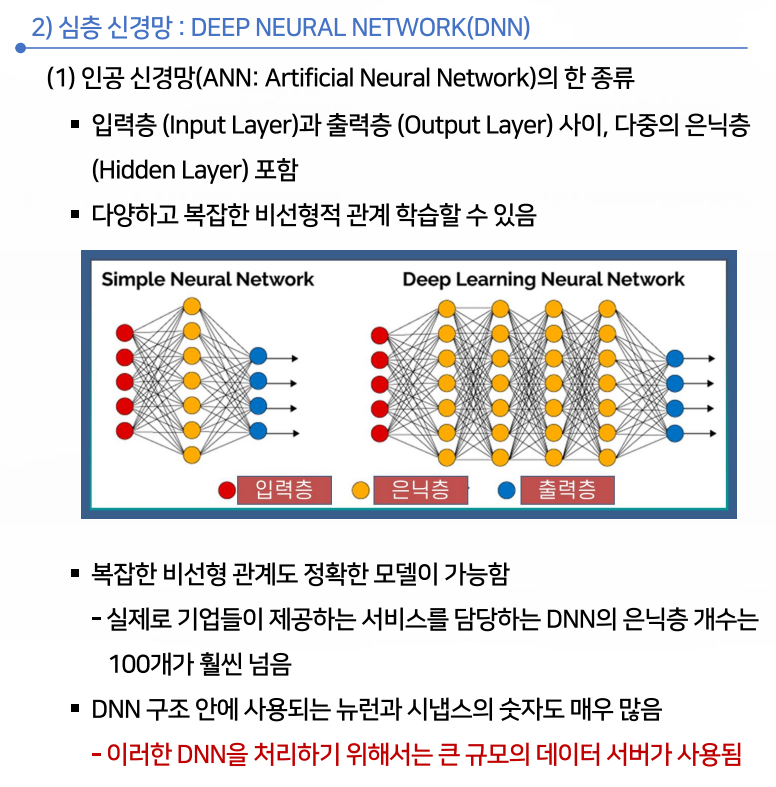

In [2]:
Image('img/day01_03.png', width=600)

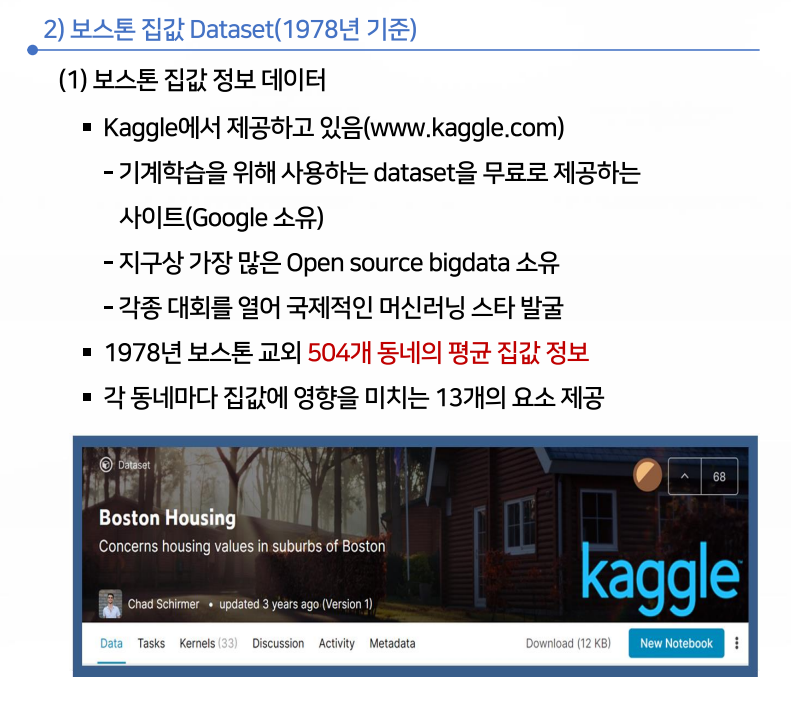

In [3]:
Image('img/day01_04.png', width=600)

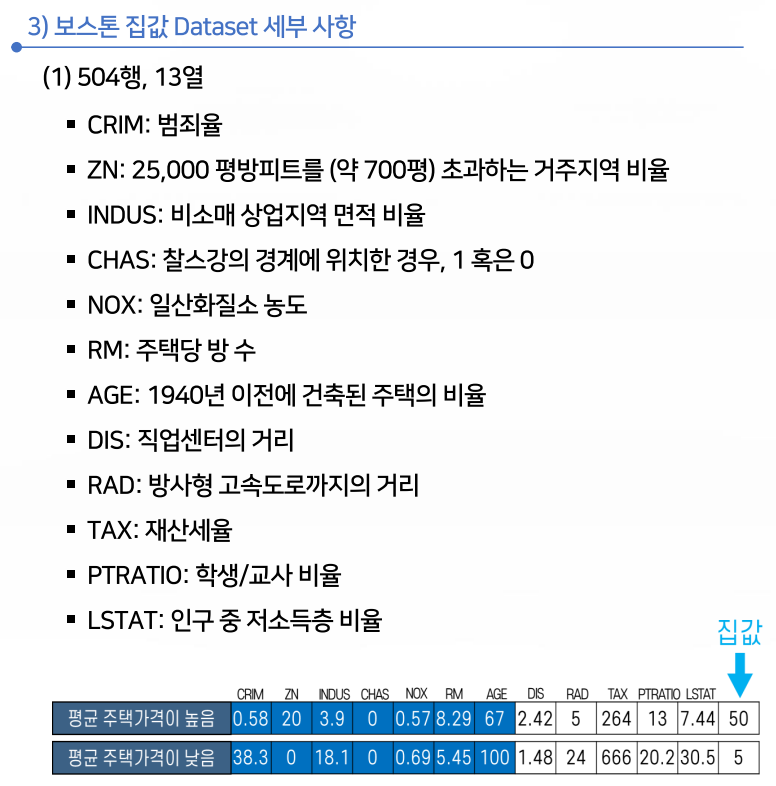

In [4]:
Image('img/day01_05.png', width=600)

In [5]:
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [6]:
# 하이퍼 파라미터
MY_EPOCH = 500
MY_BATCH = 64

### 데이터 수집

In [7]:
raw = pd.read_csv('data/housing.csv')
raw

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [8]:
# from sklearn.datasets import fetch_openml
# boston = fetch_openml(name="boston", version=1, as_frame=True)
# boston

### 2. 정규화 처리

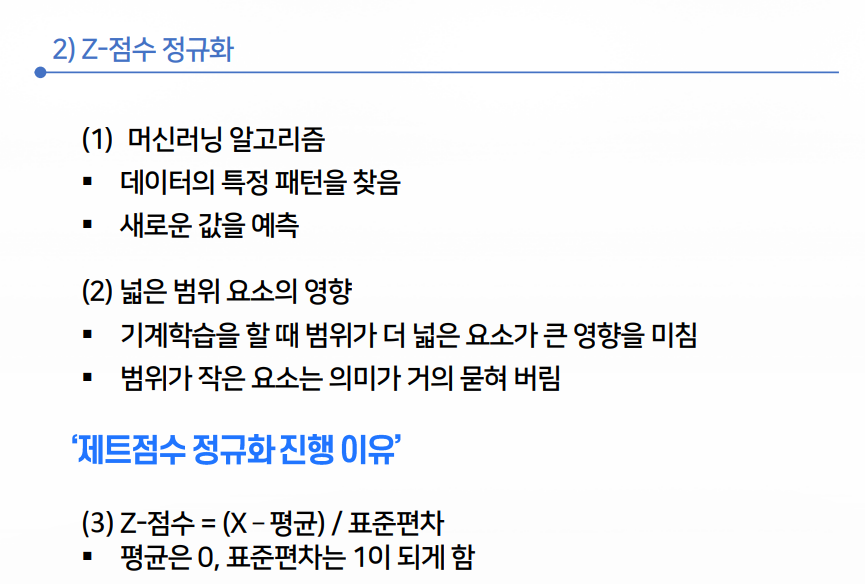

In [9]:
Image("img/day01_06.png",width=600)

In [10]:
# z-점수 정규화의 결과는 numpy의 n차원 행렬 방정식
scaler = StandardScaler()
z_data = scaler.fit_transform(raw)
print(z_data)
print(type(z_data))

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038 -1.0755623
   0.15968566]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415 -0.49243937
  -0.10152429]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415 -1.2087274
   1.32424667]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583 -0.98304761
   0.14880191]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583 -0.86530163
  -0.0579893 ]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583 -0.66905833
  -1.15724782]]
<class 'numpy.ndarray'>


In [11]:
z_data = pd.DataFrame(z_data,columns=raw.columns)
z_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,-0.865302,-0.057989


### 학습용과 평가용 분리하기

In [12]:
# test_size = 0.3 랜덤 30% 추출
X_train, X_test, y_train, y_test = train_test_split(z_data.iloc[:,:12],z_data.iloc[:,12:], test_size=0.3, random_state=42)

print("학습용 입력 데이터: ",X_train.shape)
print("학습용 출력 데이터: ",y_train.shape)
print("평가용 입력 데이터: ",X_test.shape)
print("평가용 출력 데이터: ",y_test.shape)

학습용 입력 데이터:  (354, 12)
학습용 출력 데이터:  (354, 1)
평가용 입력 데이터:  (152, 12)
평가용 출력 데이터:  (152, 1)


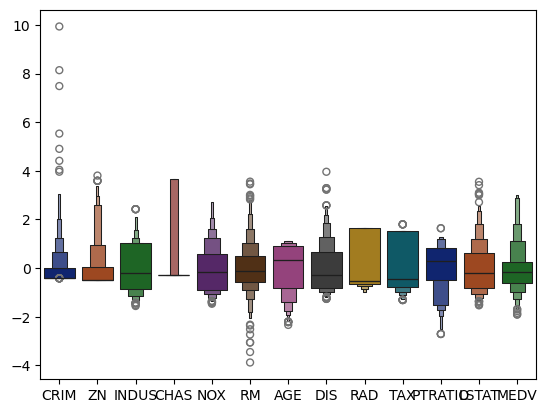

In [13]:
sns.boxenplot(data=z_data, palette='dark')
plt.show()

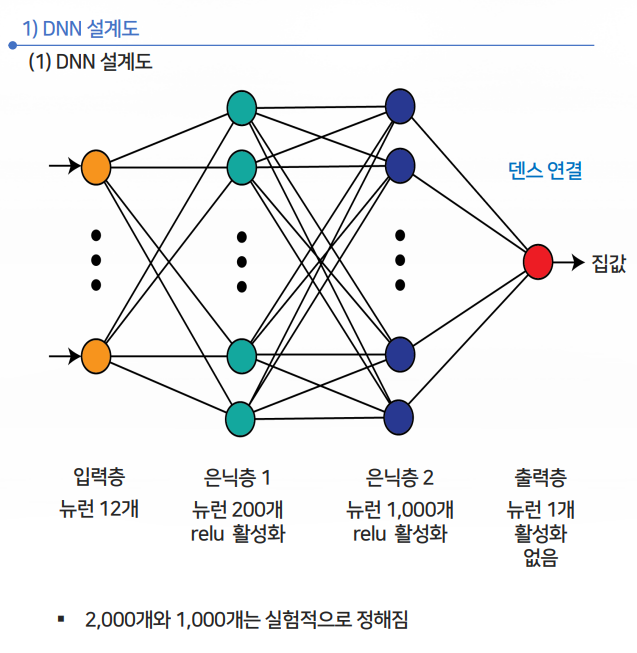

In [14]:
Image("img/day01_08.png")

### (12 * 200) +200 = 2600개 (덴스 연결 1:1 완전 연결)

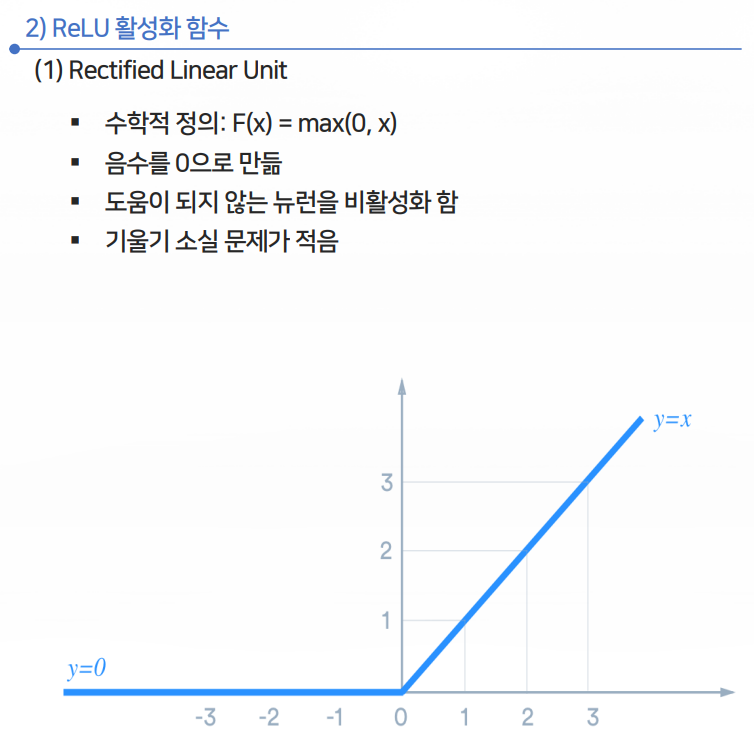

In [15]:
Image('img/day01_09.png', width=600)

### 4. 인공 신경망 구현

In [16]:
## keras DNN 구현
model = Sequential()
input = X_train.shape[1]

model.add(Dense(200, input_dim=input, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1))
model.summary()

C:\Users\ICT05_01\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │         201,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,601 (799.22 KB)

 Trainable params: 204,601 (799.22 KB)

 Non-trainable params: 0 (0.00 B)

> - 역전파 : 손실함수로부터 계산된 오차를 각 층으로 역전파하여 가중치를 업데이트. (경사하강법 사용)

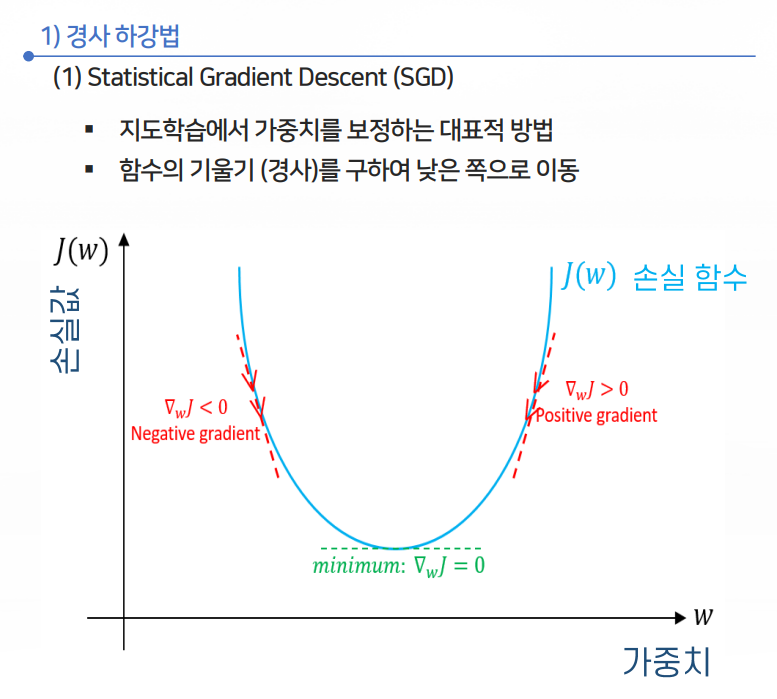

In [18]:
Image('img/day01_10.png', width=600)

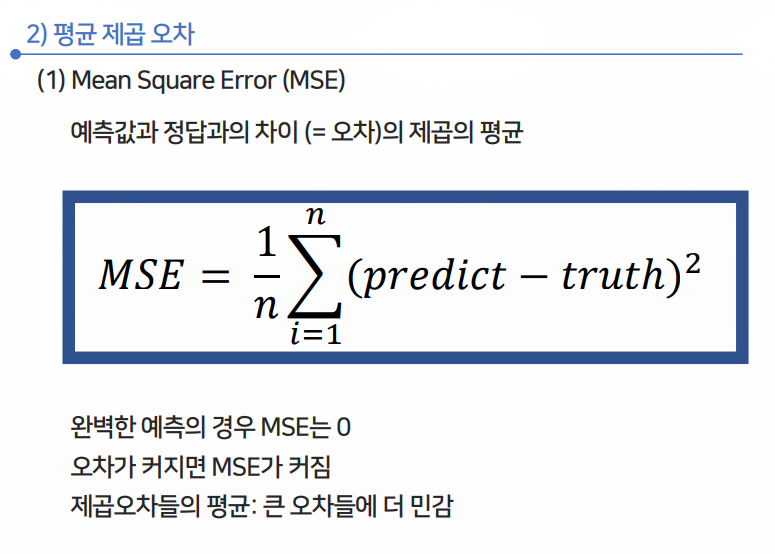

In [19]:
Image('img/day01_11.png', width=600)

### 5. 인공 신경망 학습환경 설정 (모델 컴파일)

In [21]:
# 최적화 함수, 손실함수 지정
model.compile(optimizer='sgd', loss='mse')

print("학습 시작")
begin = time()

# 학습 시작
# MY_EPOCH = 500 (반복횟수), MY_BATCH = 64 (학습할 데이터 크기)
model.fit(X_train,y_train, epochs=MY_EPOCH , batch_size = MY_BATCH, verbose=0)

end = time()
print("총 학습시간  : {:.1f}초".format(end-begin))

학습 시작
Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1236  
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7274 
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5615 
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5190 
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5137 
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3212 
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2616 
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2680 
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2555 
Epoch 10/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2153 
Epoch 11/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2602 
Epoch 12/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2183 
Epoch 13/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2215 
Epoch 14/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2228 
Epoch 15/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2156 
Epoch 16/500

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1127 
Epoch 83/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1053 
Epoch 84/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1135 
Epoch 85/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1037 
Epoch 86/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0935 
Epoch 87/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0928 
Epoch 88/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0865 
Epoch 89/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1066 
Epoch 90/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1118 
Epoch 91/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0936 
Epoch 92/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1163 
Epoch 93/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1171 
Epoch 94/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1060 
Epoch 95/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0854 
Epoch 96/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0874 
Epoch 97/500
6/6 ━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0695 
Epoch 164/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0688 
Epoch 165/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0696 
Epoch 166/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0638 
Epoch 167/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0721 
Epoch 168/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0640 
Epoch 169/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0773 
Epoch 170/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0709 
Epoch 171/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0765 
Epoch 172/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0717 
Epoch 173/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0736 
Epoch 174/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0687 
Epoch 175/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0770 
Epoch 176/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0636 
Epoch 177/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0674 
Epoch 178

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0525 
Epoch 245/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0554 
Epoch 246/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0579 
Epoch 247/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0532 
Epoch 248/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0602 
Epoch 249/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0625 
Epoch 250/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505 
Epoch 251/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0530 
Epoch 252/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0580 
Epoch 253/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0543 
Epoch 254/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0536 
Epoch 255/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0571 
Epoch 256/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0498 
Epoch 257/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0591 
Epoch 258/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0515 
Epoch 259

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0457 
Epoch 326/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0451 
Epoch 327/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0494 
Epoch 328/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0491 
Epoch 329/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0493 
Epoch 330/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0414 
Epoch 331/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0455 
Epoch 332/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0521 
Epoch 333/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0429 
Epoch 334/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0465 
Epoch 335/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0489 
Epoch 336/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0461 
Epoch 337/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0494 
Epoch 338/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0432 
Epoch 339/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0462 
Epoch 340

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0395 
Epoch 407/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0363 
Epoch 408/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454 
Epoch 409/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0416 
Epoch 410/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0415 
Epoch 411/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0429 
Epoch 412/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0427 
Epoch 413/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0409 
Epoch 414/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0440 
Epoch 415/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0385 
Epoch 416/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0437 
Epoch 417/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0438 
Epoch 418/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0392 
Epoch 419/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0441 
Epoch 420/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0426 
Epoch 421

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0375 
Epoch 488/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0361 
Epoch 489/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0356 
Epoch 490/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0386 
Epoch 491/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0356 
Epoch 492/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0381 
Epoch 493/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0362 
Epoch 494/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0398 
Epoch 495/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0331 
Epoch 496/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0350 
Epoch 497/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0391 
Epoch 498/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0388 
Epoch 499/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0366 
Epoch 500/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 
총 학습시간  : 21.8초


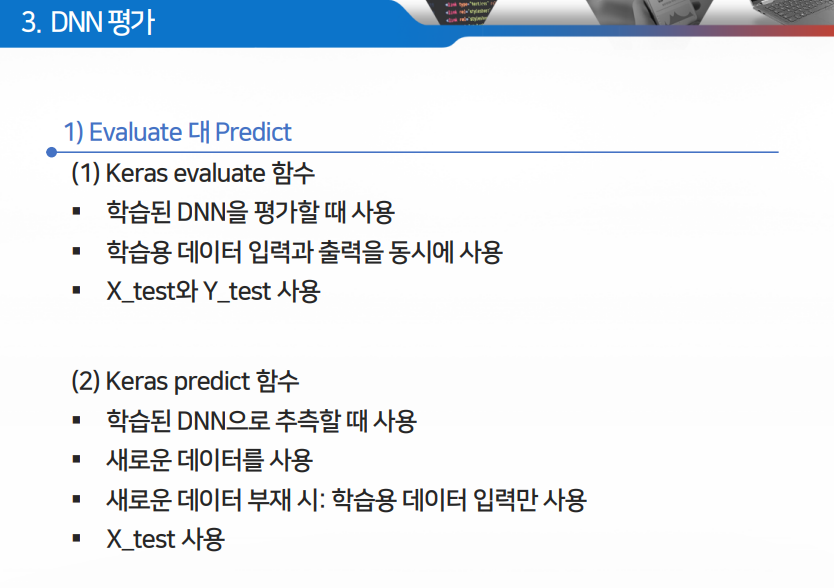

In [23]:
Image('img/day01_12.png')

### 6. 인공 신경망 평가 및 활용

In [24]:
# 신경망 평가 및 손실값 계산
loss = model.evaluate(X_test, y_test, verbose=0)
print("DNN 평균 제곱 오차 (MSE): {:.2f}".format(loss))


DNN 평균 제곱 오차 (MSE): 0.11


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


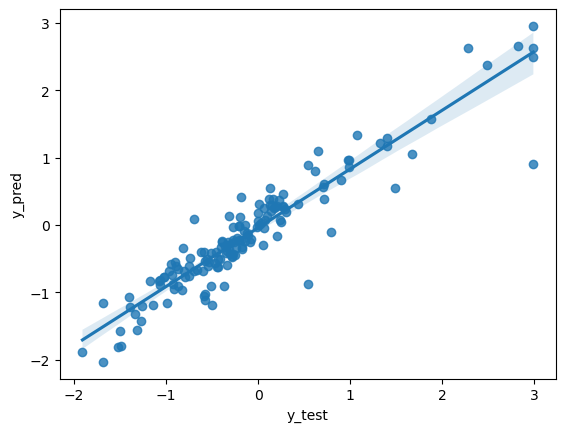

In [26]:
## pred => 예측값
pred = model.predict(X_test)
sns.regplot(x=y_test, y=pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()